# Exploratory Data Analysis(EDA): Python
### *Learning the basics of Exploratory Data Analysis using Python with Numpy, Matplotlib, and Pandas.*
Using the materials of Kaushik Katari, <a href="https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14" target="_blank">TowardsDataScience.com</a>


## What is Exploratory Data Analysis(EDA)?
If we want to explain EDA in simple terms, it means trying to understand the given data much better, so that we can make some sense out of it.

We can find a more formal definition in <a href="https://en.wikipedia.org/wiki/Exploratory_data_analysis" target="_blank">Wikipedia</a>.

*In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.*

EDA in Python uses data visualization to draw meaningful patterns and insights. It also involves the preparation of data sets for analysis by removing irregularities in the data.

Based on the results of EDA, companies also make business decisions, which can have repercussions later.
* If EDA is not done properly then it can hamper the further steps in the machine learning model building process.
* If done well, it may improve the efficacy of everything we do next.

In this article we’ll see about the following topics:
1. Data Sourcing
2. Data Cleaning
3. Univariate analysis
4. Bivariate analysis
5. Multivariate analysis

## 1. Data Sourcing
Data Sourcing is the process of finding and loading the data into our system. Broadly there are two ways in which we can find data.
1. Private Data
2. Public Data

For this exercise we will be using Publiccly available data set.

## 2. Data Cleaning
After completing the Data Sourcing, the next step in the process of EDA is Data Cleaning. It is very important to get rid of the irregularities and clean the data after sourcing it into our system.

Irregularities are of different types of data.
* Missing Values
* Incorrect Format
* Incorrect Headers
* Anomalies/Outliers

To perform the data cleaning we are using a sample data set, which can be found in course Moodle page.

First, let’s import the necessary libraries and store the data in our system for analysis.

In [16]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

filepath = r"C:\Users\user\PycharmProjects\ML_Lab\DataAnalysis\week 3\class1_Marketing_Analysis.txt"

# Read the data set of "Marketing Analysis" in data.
data= pd.read_csv(filepath)

# Printing the data
data.head()

C:\1\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


Here, \U in "C:\Users... starts an eight-character Unicode escape, such as \U00014321. In your code, the escape is followed by the character 's', which is invalid.

You either need to duplicate all backslashes

Or prefix the string with r (to produce a raw string): r"C:\Users\Eric\Desktop\beeline.txt"
***
When an 'r' or 'R' prefix is present, a character following a backslash is included in the string without change, and all backslashes are left in the string. For example, the string literal r"\n" consists of two characters: a backslash and a lowercase 'n' .
***


In [17]:
# Read the file in data without first two rows as it is of no use.
data = pd.read_csv(filepath,skiprows = 2)

#print the head of the data frame.
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [18]:
# Drop the customer id as it is of no use.
data.drop('customerid', axis = 1, inplace = True)

#Extract job  & Education in newly from "jobedu" column.
data['job']= data["jobedu"].apply(lambda x: x.split(",")[0])
data['education']= data["jobedu"].apply(lambda x: x.split(",")[1])

# Drop the "jobedu" column from the dataframe.
data.drop('jobedu', axis = 1, inplace = True)

# Printing the Dataset
data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Missing Values
If there are missing values in the Dataset before doing any statistical analysis, we need to handle those missing values.
There are mainly three types of missing values.
1. MCAR(Missing completely at random): These values do not depend on any other features.
2. MAR(Missing at random): These values may be dependent on some other features.
3. MNAR(Missing not at random): These missing values have some reason for why they are missing.

Let’s see which columns have missing values in the dataset.

In [19]:
# Checking the missing values
data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

As we can see three columns contain missing values. Let’s see how to handle the missing values. We can handle missing values by **dropping** the missing records or by **imputing** the values.

### Drop the missing Values
Let’s handle missing values in the `age` column.

In [20]:
# Dropping the records with age missing in data dataframe.
data = data[~data.age.isnull()].copy()

# Checking the missing values in the dataset.
data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

Check the missing values in the dataset again now.

In [21]:
# Checking the missing values
data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

Let’s **impute values** to the missing values for the month column.

Since the month column is of an object type, let’s calculate the mode of that column and impute those values to the missing values.

In [22]:
# Find the mode of month in data
month_mode = data.month.mode()[0]

# Fill the missing values with mode value of month in data.
data.month.fillna(month_mode, inplace = True)

# Let's see the null values in the month column.
data.month.isnull().sum()

0

Handling the missing values in the **Response** column. Since, our target column is Response Column, if we impute the values to this column it’ll affect our analysis. So, it is better to drop the missing values from Response Column.

In [23]:
#drop the records with response missing in data.
data = data[~data.response.isnull()].copy()

# Calculate the missing values in each column of data frame
data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

Check whether the missing values in the dataset have been handled or not.

We can also, fill the missing values as **‘NaN’** so that while doing any statistical analysis, it won’t affect the outcome.

### Handling Outliers
We have seen how to fix missing values, now let’s see how to handle **outliers** in the dataset.

***Outliers are the values that are far beyond the next nearest data points.***

There are two types of outliers:
1. **Univariate outliers:** Univariate outliers are the data points whose values lie beyond the range of expected values based on one variable.
2. **Multivariate outliers:** While plotting data, some values of one variable may not lie beyond the expected range, but when you plot the data with some other variable, these values may lie far from the expected value.


![Types of outliers](\lab0_outliers.png)

So, after understanding the causes of these outliers, we can handle them by dropping those records or imputing with the values or leaving them as is, if it makes more sense.

### Standardizing Values
To perform data analysis on a set of values, we have to make sure the values in the same column should be on the same scale. For example, if the data contains the values of the top speed of different companies’ cars, then the whole column should be either in meters/sec scale or miles/sec scale.

Now, that we are clear on how to source and clean the data, let’s see how we can analyze the data.

## 3. Univariate Analysis
If we analyze data over a single variable/column from a dataset, it is known as Univariate Analysis.

### Categorical Unordered Univariate Analysis:

An unordered variable is a categorical variable that has no defined order. If we take our data as an example, the job column in the dataset is divided into many sub-categories like technician, blue-collar, services, management, etc. There is no weight or measure given to any value in the ‘job’ column.

Now, let’s analyze the job category by using plots. Since Job is a category, we will plot the bar plot.

In [29]:
# Let's calculate the percentage of each job status category.
data.job.value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

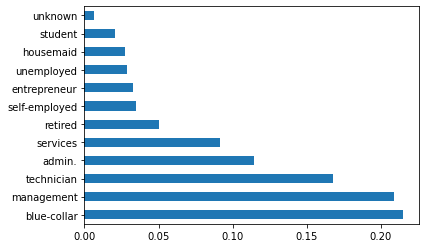

In [30]:
#plot the bar graph of percentage job categories
data.job.value_counts(normalize=True).plot.barh()
plt.show()

By the above bar plot, we can infer that the data set contains more number of blue-collar workers compared to other categories.

### Categorical Ordered Univariate Analysis:
Ordered variables are those variables that have a natural rank of order. Some examples of categorical ordered variables from our dataset are:
* Month: Jan, Feb, March……
* Education: Primary, Secondary,……

Now, let’s analyze the Education Variable from the dataset. Since we’ve already seen a bar plot, let’s see how a Pie Chart looks like.

In [26]:
#calculate the percentage of each education category.
data.education.value_counts(normalize=True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

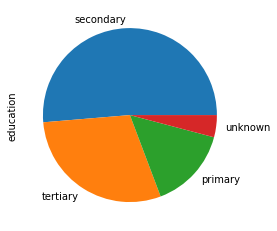

In [27]:
#plot the pie chart of education categories
data.education.value_counts(normalize=True).plot.pie()
plt.show()

By the above analysis, we can infer that the data set has a large number of them belongs to secondary education after that tertiary and next primary. Also, a very small percentage of them have been unknown.

This is how we analyze univariate categorical analysis. If the column or variable is of **numerical** then we’ll analyze by calculating its **mean, median, std, etc.** We can get those values by using the describe function.

In [28]:
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

## 4. Bivariate Analysis
If we analyze data by taking two variables/columns into consideration from a dataset, it is known as Bivariate Analysis.
### Numeric-Numeric Analysis:
Analyzing the two numeric variables from a dataset is known as numeric-numeric analysis. We can analyze it in three different ways.
* Scatter Plot
* Pair Plot
* Correlation Matrix

### Scatter Plot
Let’s take three columns ‘Balance’, ‘Age’ and ‘Salary’ from our dataset and see what we can infer by plotting to scatter plot between `salary balance` and `age balance`

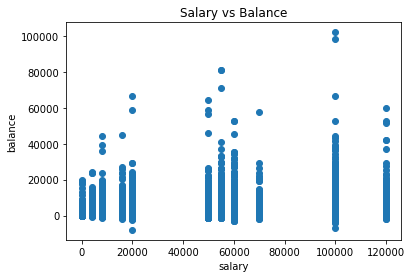

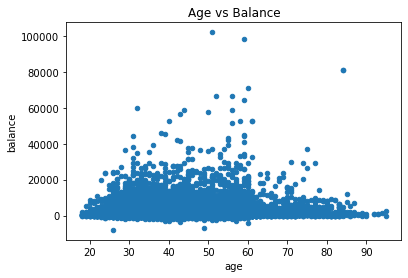

In [31]:
#plot the scatter plot of balance and salary variable in data
plt.scatter(data.salary,data.balance)
plt.title("Salary vs Balance")
plt.ylabel("balance")
plt.xlabel("salary")
plt.show()

#plot the scatter plot of balance and age variable in data
data.plot.scatter(x="age",y="balance")
plt.title("Age vs Balance")
plt.show()

### Pair Plot
Now, let’s plot Pair Plots for the three columns we used in plotting Scatter plots. We’ll use the seaborn library for plotting Pair Plots.

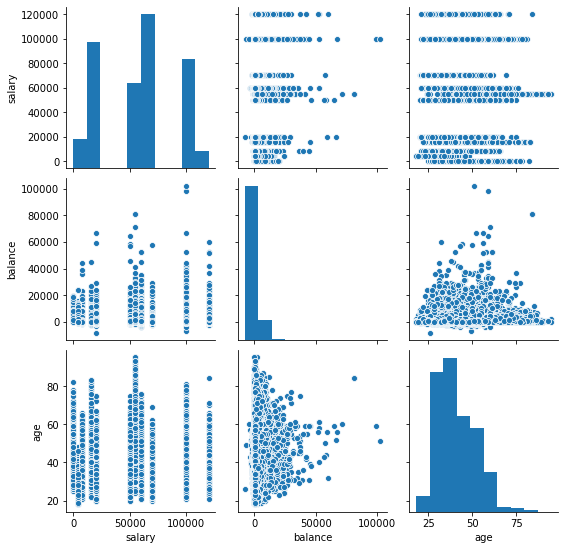

In [32]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = data, vars=['salary','balance','age'])
plt.show()

### Correlation Matrix
Since we cannot use more than two variables as x-axis and y-axis in Scatter and Pair Plots, it is difficult to see the relation between three numerical variables in a single graph. In those cases, we’ll use the correlation matrix.

In [33]:
# Creating a matrix using age, salry, balance as rows and columns
data[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


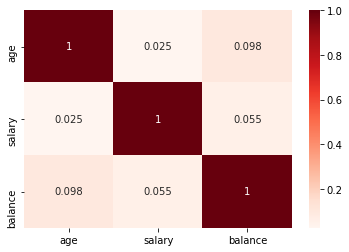

In [34]:
#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(data[['age','salary','balance']].corr(), annot=True, cmap = 'Reds')
plt.show()

First, we created a matrix using age, salary, and balance. After that, we are plotting the heatmap using the **seaborn** library of the matrix.

### Numeric - Categorical Analysis
Analyzing the one numeric variable and one categorical variable from a dataset is known as numeric-categorical analysis. We analyze them mainly using **mean, median, and box plots.**

Let’s take `salary` and `response` columns from our dataset.

First check for mean value using `groupby`

In [38]:
#groupby the response to find the mean of the salary with response no & yes separately.
data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

There is not much of a difference between the yes and no response based on the salary.
Let’s calculate the median,

In [39]:
#groupby the response to find the median of the salary with response no & yes separately.
data.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

By both mean and median we can say that the response of yes and no remains the same irrespective of the person’s salary. But, is it truly behaving like that, let’s plot the box plot for them and check the behavior.

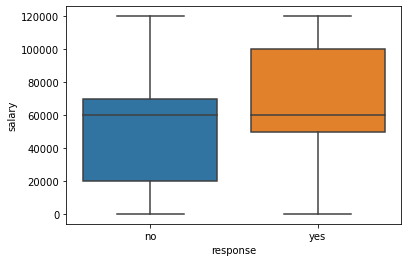

In [40]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data.response, data.salary)
plt.show()

As we can see, when we plot the Box Plot, it paints a very different picture compared to mean and median. The IQR for customers who gave a positive response is on the higher salary side.

This is how we analyze Numeric-Categorical variables, we use mean, median, and Box Plots to draw some sort of conclusions.

### Categorical — Categorical Analysis
Since our target variable/column is the Response rate, we’ll see how the different categories like Education, Marital Status, etc., are associated with the Response column. So instead of ‘Yes’ and ‘No’ we will convert them into ‘1’ and ‘0’, by doing that we’ll get the “Response Rate”.

In [41]:
#create response_rate of numerical data type where response "yes"= 1, "no"= 0
data['response_rate'] = np.where(data.response=='yes',1,0)
data.response_rate.value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64


Let’s see how the response rate varies for different categories in marital status.



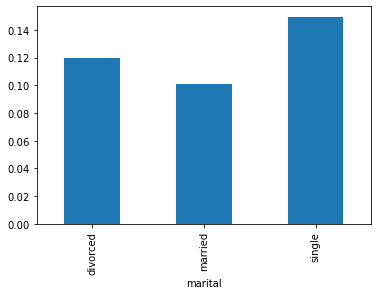

In [42]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

By the above graph, we can infer that the positive response is more for Single status members in the data set. Similarly, we can plot the graphs for Loan vs Response rate, Housing Loans vs Response rate, etc.

## 5. Multivariate Analysis

If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.

Let’s see how ‘Education’, ‘Marital’, and ‘Response_rate’ vary with each other.

First, we’ll create a pivot table with the three columns and after that, we’ll create a heatmap.

In [43]:
result = pd.pivot_table(data=data, index='education', columns='marital',values='response_rate')
result

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


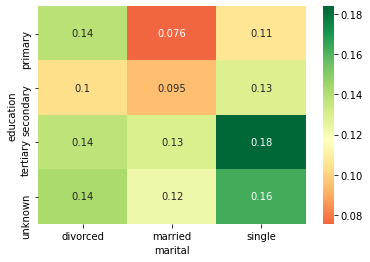

In [44]:
#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

Based on the Heatmap we can infer that the married people with primary education are less likely to respond positively for the survey and single people with tertiary education are most likely to respond positively to the survey.
Similarly, we can plot the graphs for Job vs marital vs response, Education vs poutcome vs response, etc.

## Conclusion
This is how we’ll do Exploratory Data Analysis. Exploratory Data Analysis (EDA) helps us to look beyond the data. The more we explore the data, the more the insights we draw from it. As a data analyst, almost 80% of our time will be spent understanding data and solving various business problems through EDA.